# Analysis for plot of AV-V Flash Lag Effect

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from scipy.io import loadmat


In [2]:
# # Load data loadmat
# data = loadmat('data/874707_av_v_fle_2024-10-09_12h54.02.373.mat')
   
# # Zip the arrays to the shortest length
# zipped_data = list(zip(data["responses"], data["responseTimes"], data["incidentTimesAimed"], data["audioDelaysAimed"], data["visualDelaysAimed"], data["trialDurations"], data["audioTime"], data["flashTime"], data["trialNum"]))
# # Unzip the data back into individual lists
# all_responses, responseTimes, incidentTimes, audioDelays, visualDelays, trial_durs, audioTime, flashTime, trialNum = map(list, zip(*zipped_data))
# df = pd.DataFrame({
#     'responses': flatten_extend(all_responses),
#     'responseTimes': flatten_extend(responseTimes),
#     'incidentTimesAimed': flatten_extend(incidentTimes),
#     'audioDelaysAimed': flatten_extend(audioDelays),
#     'visualDelaysAimed': flatten_extend(visualDelays),
#     'trialDurations': flatten_extend(trial_durs),
#     'audioTime': flatten_extend(audioTime),
#     'flashTime': flatten_extend(flashTime),
#     'trialNum': flatten_extend(trialNum)
# })

In [3]:
# Setup plot defaults
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sio

# Matplotlib settings
#
#reset styling to default
plt.rcdefaults()
# styling settings
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_palette("husl")
# grid on
plt.rcParams['axes.grid'] = True

# top and right axis spines off
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
# title 18 x y labels 16 ticks 14
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['figure.figsize'] = (10, 6)

# make axis equal
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['figure.autolayout'] = True
# grid color
plt.rcParams['grid.color'] = '0.9'


In [4]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

#all_responses=flatten_extend(all_responses)


In [5]:
df =  pd.read_csv('data/405836_av_v_fle_2024-10-14_16h33.24.360.csv')
# Create a new column that will represent the audioDelayAimed in terms of ms
df['audioDelayAimed_ms'] = df['audioDelaysAimed']*16.6667
df['visualDelayAimed_ms'] = df['visualDelaysAimed']*16.6667
df['audioDelayReal_ms'] =(df["audioTime"]-df["flashTime"])*1000
df




,Unnamed: 0,responses,responseTimes,incidentTimesAimed,audioDelaysAimed,visualDelaysAimed,trialDurations,audioTime,flashTime,trialNum,flashPostionX,bar_at_flash_X,directions,audioDelayAimed_ms,visualDelayAimed_ms,audioDelayReal_ms
0,0,0,0.432225,0.819932,-2,-1,1.314014,0.781183,0.813639,1,105.732678,96.601727,1,-33.3334,-16.6667,-32.4559
1,1,0,0.035571,0.617446,-2,-1,1.314014,0.566077,0.599764,2,12.969684,22.100635,-1,-33.3334,-16.6667,-33.6877
2,2,0,0.099354,0.759993,-2,-2,1.314014,0.714396,0.747711,3,78.339825,60.077923,1,-33.3334,-33.3334,-33.3150
3,3,1,0.133810,0.802736,4,2,1.314014,0.864917,0.798283,4,-69.208874,-87.470776,-1,66.6668,33.3334,66.6343
4,4,1,0.050594,0.618635,6,2,1.314014,0.715489,0.614941,5,-31.231586,-12.969684,1,100.0002,33.3334,100.5482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,387,1,1.800538,0.560955,-4,2,1.314014,0.482929,0.550143,388,67.755390,49.493488,-1,-66.6668,33.3334,-67.2141
388,388,1,0.283460,0.470659,-2,2,1.314014,0.427323,0.461356,389,-113.410145,-95.148243,1,-33.3334,33.3334,-34.0327
389,389,0,0.133495,0.670326,-6,0,1.314014,0.564419,0.665328,390,-14.423168,-14.423168,-1,-100.0002,0.0000,-100.9092
390,390,0,0.034304,0.732522,-6,-4,1.314014,0.612492,0.712959,391,78.339825,41.816021,1,-100.0002,-66.6668,-100.4673


[-100.0002  -66.6668  -33.3334    0.       33.3334   66.6668  100.0002]


' \nThis figure shows the mean proportion of lag responses as a function of the visual delay of the flash relative to the bar.\nEach line represents a different audio delay. The x-axis represents the visual delay of the flash relative to the bar in milliseconds, \nand the y-axis represents the proportion of lag responses. The horizontal dashed line represents the chance level of 0.5, \nand the vertical dashed line represents the point of simultaneity. The data show that the proportion of lag responses increases as the visual delay \nof the flash relative to the bar increases. The data also show that the proportion of lag responses increases as the audio delay increases. \nThis suggests that the audio delay influences the perception of temporal processing between the flash and the bar.\n\n\n'

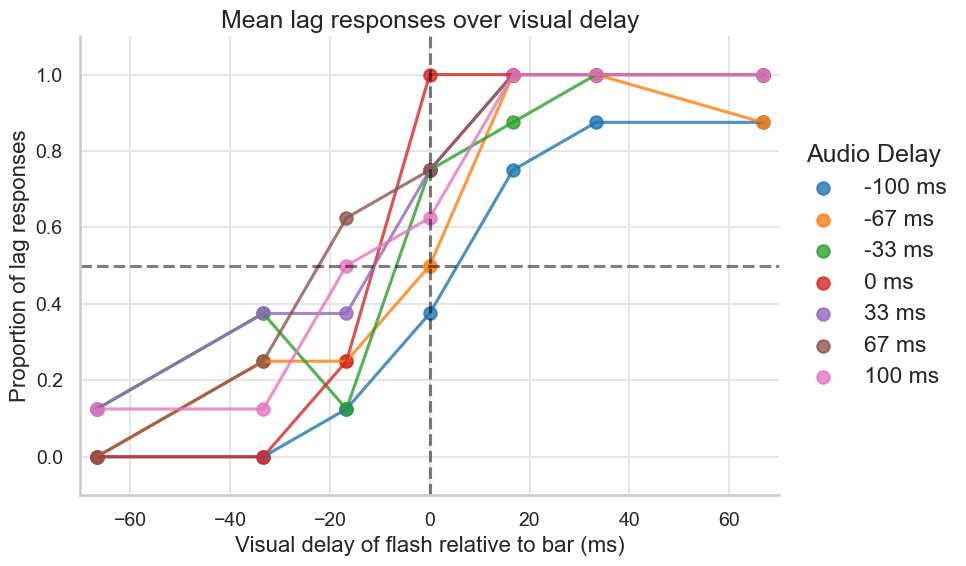

In [6]:
unique_audioDelays = np.unique(df['audioDelayAimed_ms'])

print(unique_audioDelays)
colors=plt.get_cmap('tab10').colors

for delays,delays in enumerate(unique_audioDelays):
    meanX = df[df['audioDelayAimed_ms'] == delays].groupby('visualDelayAimed_ms').mean().reset_index()
    meanResponses = meanX['responses']
    plt.scatter(meanX['visualDelayAimed_ms'], meanResponses, color=colors[delays],label=f'{round(delays)} ms',alpha=0.8)
    plt.plot(meanX['visualDelayAimed_ms'], meanResponses, color=colors[delays],alpha=0.8)

plt.ylim(-0.1, 1.10)  # Extend the y-axis limit slightly beyond 0 and 1
# extend the x-axis limit slightly beyond 0
plt.xlim(-70, 70)
plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.title('Mean lag responses over visual delay')
plt.legend(title='Audio Delay', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Visual delay of flash relative to bar (ms)')
plt.ylabel('Proportion of lag responses')
plt.title

""" 
This figure shows the mean proportion of lag responses as a function of the visual delay of the flash relative to the bar.
Each line represents a different audio delay. The x-axis represents the visual delay of the flash relative to the bar in milliseconds, 
and the y-axis represents the proportion of lag responses. The horizontal dashed line represents the chance level of 0.5, 
and the vertical dashed line represents the point of simultaneity. The data show that the proportion of lag responses increases as the visual delay 
of the flash relative to the bar increases. The data also show that the proportion of lag responses increases as the audio delay increases. 
This suggests that the audio delay influences the perception of temporal processing between the flash and the bar.


"""

[-100.0002  -66.6668  -33.3334    0.       33.3334   66.6668  100.0002]


C:\Users\omeru\AppData\Local\Temp\ipykernel_15576\4056475205.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='visualDelayAimed_ms_jittered', y='responses_jittered', hue='audioDelaysAimed', data=grouped_data, ci=None, legend=False, palette='tab10')


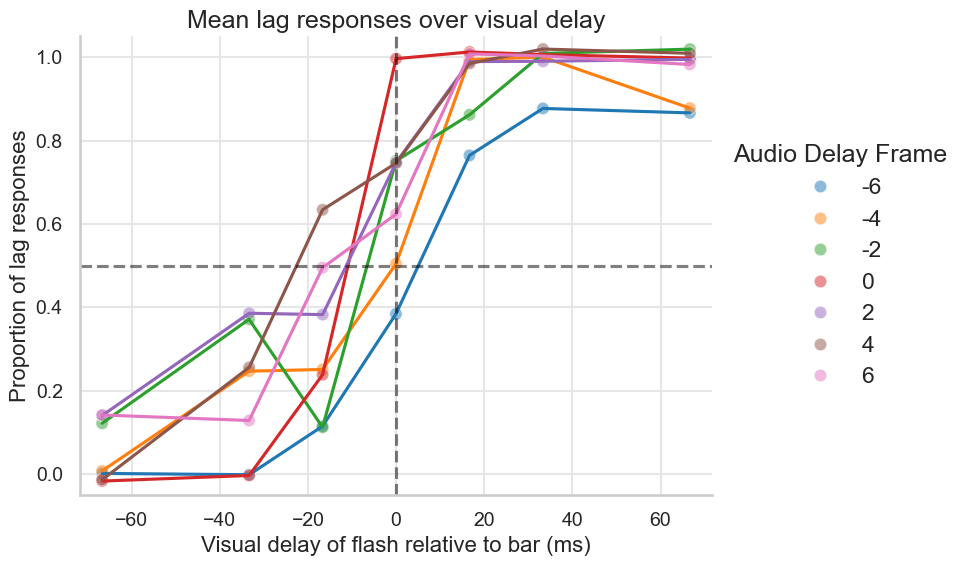

In [7]:
# now plot the mean responses for each visual delay aimed and audio delay aimed
# Group the data by visualDelayAimed and audioDelayAimed and calculate the mean of responses
grouped_data = df.groupby(['visualDelayAimed_ms', 'audioDelaysAimed']).mean().reset_index()
grouped_data

# Assuming 'responses' is already in the grouped_data DataFrame
# Create a jitter effect
jitter_strength = .01 # Adjust as needed
grouped_data['visualDelayAimed_ms_jittered'] = grouped_data['visualDelayAimed_ms'] + np.random.normal(0, jitter_strength, size=len(grouped_data))
grouped_data['responses_jittered'] = grouped_data['responses'] + np.random.normal(0, jitter_strength, size=len(grouped_data))

unique_audioDelays = grouped_data['audioDelayAimed_ms'].unique()
print(unique_audioDelays)


# Plot the data with jitter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visualDelayAimed_ms_jittered', y='responses_jittered', hue='audioDelaysAimed', data=grouped_data, palette='tab10', alpha=0.5)
# connect the points with lines
sns.lineplot(x='visualDelayAimed_ms_jittered', y='responses_jittered', hue='audioDelaysAimed', data=grouped_data, ci=None, legend=False, palette='tab10')
plt.xlabel('Visual delay of flash relative to bar (ms)')
plt.ylabel('Proportion of lag responses')
plt.ylim(-0.05, 1.05)  # Extend the y-axis limit slightly beyond 0 and 1
plt.xlim(grouped_data['visualDelayAimed_ms'].min() - 5, grouped_data['visualDelayAimed_ms'].max() + 5)  # Extend the x-axis limit slightly beyond min and max values
plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.title('Mean lag responses over visual delay')
plt.legend(title='Audio Delay Frame', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

## Psychometric function fitting


c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


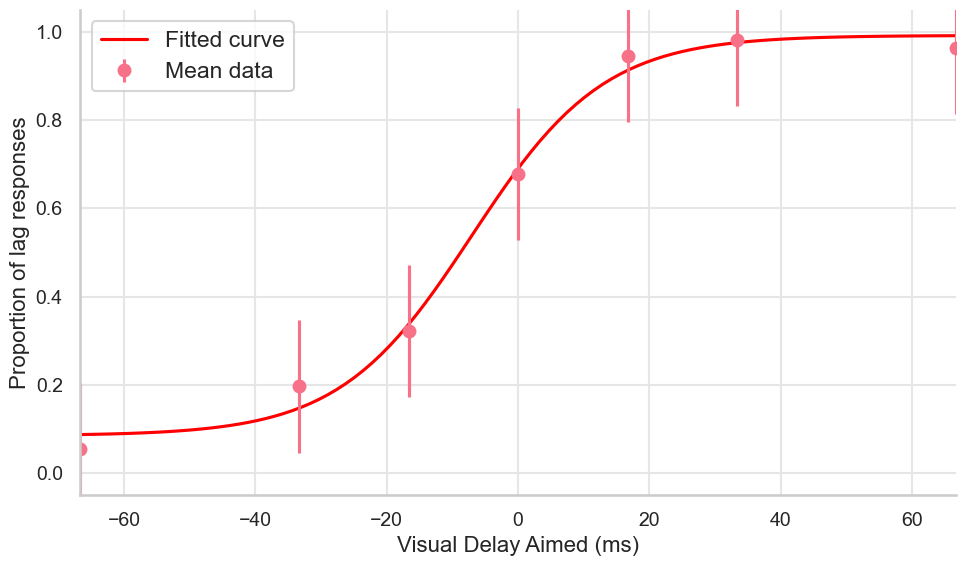

In [8]:
import numpy as np
from scipy.optimize import curve_fit
# Define the logistic function
def logistic_function(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

# Prepare the data for fitting
x_data = df['visualDelayAimed_ms']
y_data = df['responses']

# Initial guess for the parameters
initial_guess = [max(y_data), np.median(x_data), 1, min(y_data)]

# Fit the logistic function to the data
params, covariance = curve_fit(logistic_function, x_data, y_data, p0=initial_guess)
# Generate data for plotting the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = logistic_function(x_fit, *params)

# Plot the data and the fitted curve
plt.plot(x_fit, y_fit, color='red', label='Fitted curve')

# plot the mean data
mean_data = df.groupby('visualDelayAimed_ms').mean().reset_index()
plt.errorbar(mean_data['visualDelayAimed_ms'], mean_data['responses'], yerr=mean_data['responses'].sem(), fmt='o', label='Mean data')
plt.ylabel('Proportion of lag responses')
plt.ylim(-0.05, 1.05)  # Extend the y-axis limit slightly beyond 0 and 1

plt.xlabel('Visual Delay Aimed (ms)')
plt.legend()
plt.show()

In [9]:
df["audioDelayAimed_ms"]=round(df["audioDelayAimed_ms"],2)

In [43]:
df

,Unnamed: 0,responses,responseTimes,incidentTimesAimed,audioDelaysAimed,visualDelaysAimed,trialDurations,audioTime,flashTime,trialNum,flashPostionX,bar_at_flash_X,directions,audioDelayAimed_ms,visualDelayAimed_ms,audioDelayReal_ms
0,0,0,0.432225,0.819932,-2,-1,1.314014,0.781183,0.813639,1,105.732678,96.601727,1,-33.33,-16.6667,-32.4559
1,1,0,0.035571,0.617446,-2,-1,1.314014,0.566077,0.599764,2,12.969684,22.100635,-1,-33.33,-16.6667,-33.6877
2,2,0,0.099354,0.759993,-2,-2,1.314014,0.714396,0.747711,3,78.339825,60.077923,1,-33.33,-33.3334,-33.3150
3,3,1,0.133810,0.802736,4,2,1.314014,0.864917,0.798283,4,-69.208874,-87.470776,-1,66.67,33.3334,66.6343
4,4,1,0.050594,0.618635,6,2,1.314014,0.715489,0.614941,5,-31.231586,-12.969684,1,100.00,33.3334,100.5482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,387,1,1.800538,0.560955,-4,2,1.314014,0.482929,0.550143,388,67.755390,49.493488,-1,-66.67,33.3334,-67.2141
388,388,1,0.283460,0.470659,-2,2,1.314014,0.427323,0.461356,389,-113.410145,-95.148243,1,-33.33,33.3334,-34.0327
389,389,0,0.133495,0.670326,-6,0,1.314014,0.564419,0.665328,390,-14.423168,-14.423168,-1,-100.00,0.0000,-100.9092
390,390,0,0.034304,0.732522,-6,-4,1.314014,0.612492,0.712959,391,78.339825,41.816021,1,-100.00,-66.6668,-100.4673


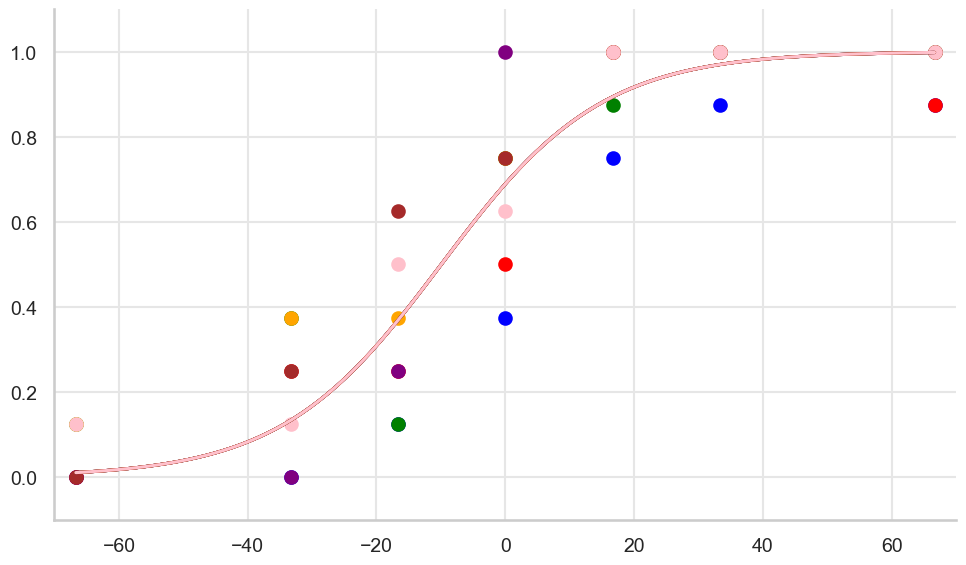

In [53]:
# fit for overall data
def logistic_function(x, delay, slope):
    return 1 / (1 + np.exp(-(x - delay) / slope))

# Prepare the data for fitting
x_data = df['visualDelayAimed_ms']
y_data = df['responses']

# Initial guess for the parameters
initial_guess = [np.median(x_data), 1]

# Fit the logistic function to the data
params, covariance = curve_fit(logistic_function, x_data, y_data, p0=initial_guess)

# Generate data for plotting the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = logistic_function(x_fit, *params)
#plt.plot(x_fit, y_fit)

# Plot the data and the fitted curve for unique audio delays
plt.figure(figsize=(10, 6))

unique_audioDelays = np.unique(df['audioDelayAimed_ms'])

colors=['blue','red','green','purple','orange','brown','pink','gray','cyan']
for  j,delays in enumerate(unique_audioDelays):
    meanX = df[df['audioDelayAimed_ms'] == delays].groupby('visualDelayAimed_ms').mean().reset_index()
    meanResponses = meanX['responses']

    plt.scatter(meanX['visualDelayAimed_ms'], meanResponses, color=colors[j])
    
    x_data =df[df['audioDelayAimed_ms'] == delays]['visualDelayAimed_ms']
    # fit for each audio delay
    x_fit=  np.linspace(min(x_data), max(x_data), 100)
    y_fit=logistic_function(x_fit, *params)
    plt.plot(x_fit, y_fit, label=f'{delays} ms', color=colors[j])

    plt.ylim(-0.1, 1.10)  # Extend the y-axis limit slightly beyond 0 and 1
    plt.xlim(-70, 70)
    



In [42]:
df[df['audioDelayAimed_ms'] == delays]['visualDelayAimed_ms']

4      33.3334
39     16.6667
43     33.3334
45     16.6667
60     16.6667
67     66.6668
68     33.3334
70    -16.6667
73      0.0000
78    -66.6668
90     66.6668
95     33.3334
102    16.6667
103    66.6668
110   -33.3334
119    66.6668
122   -16.6667
146    66.6668
151   -66.6668
152   -33.3334
163     0.0000
164   -66.6668
165   -66.6668
167   -66.6668
187     0.0000
190     0.0000
196   -66.6668
215    16.6667
216   -33.3334
220   -16.6667
246   -33.3334
256   -33.3334
262   -33.3334
267   -16.6667
269   -16.6667
276    33.3334
287     0.0000
290    16.6667
294    16.6667
319   -16.6667
333   -16.6667
344    66.6668
347   -16.6667
348    33.3334
350     0.0000
351    33.3334
356   -33.3334
357    66.6668
358     0.0000
363    66.6668
364    16.6667
368    33.3334
375   -66.6668
382   -33.3334
384     0.0000
391   -66.6668
Name: visualDelayAimed_ms, dtype: float64

C:\Users\omeru\AppData\Local\Temp\ipykernel_15576\4127980563.py:10: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(logistic_function, x_data, y_data, p0=initial_guess)


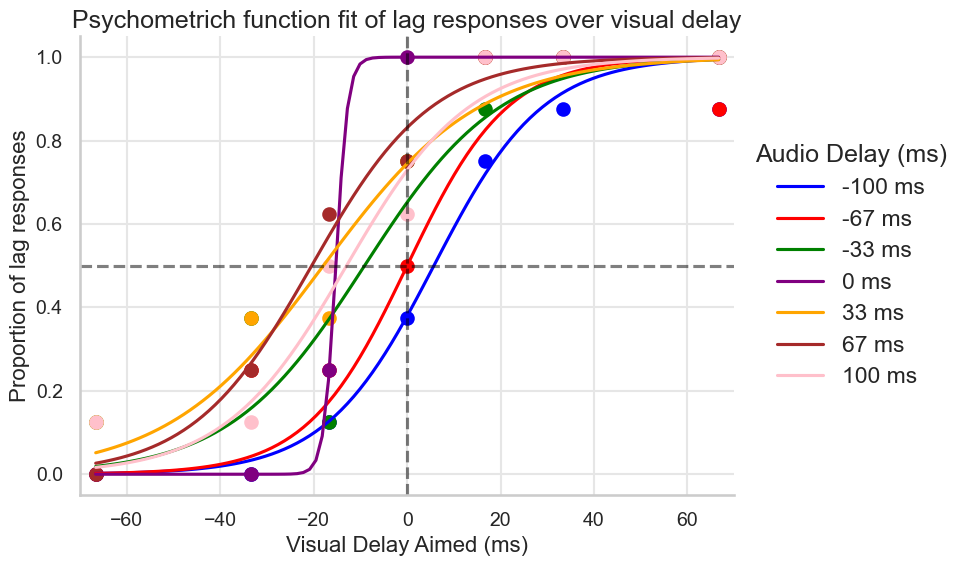

In [54]:
def fit_and_plot_psychometric(x_data, y_data):
    # Define the logistic function
    def logistic_function(x, delay, slope):
        return 1 / (1 + np.exp(-(x - delay) / slope))

    # Initial guess for the parameters
    initial_guess = [np.median(x_data), 1]

    # Fit the logistic function to the data
    params, covariance = curve_fit(logistic_function, x_data, y_data, p0=initial_guess)

    # Generate data for plotting the fitted curve
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = logistic_function(x_fit, *params)
    return x_fit, y_fit

# Example usage:
x_fit, y_fit = fit_and_plot_psychometric(df['visualDelayAimed_ms'], df['responses'])

unique_audioDelays = np.unique(df['audioDelayAimed_ms'])

colors=['blue','red','green','purple','orange','brown','pink','gray','cyan']

for j,delays in enumerate(unique_audioDelays):
    meanX = df[df['audioDelayAimed_ms'] == delays].groupby('visualDelayAimed_ms').mean().reset_index()
    meanResponses = meanX['responses']

    plt.scatter(meanX['visualDelayAimed_ms'], meanResponses, color=colors[j])
    x_fit, y_fit = fit_and_plot_psychometric(df[df['audioDelayAimed_ms'] == delays]['visualDelayAimed_ms'], df[df['audioDelayAimed_ms'] == delays]['responses'])
    plt.plot(x_fit, y_fit, label=f'{round(delays)} ms', color=colors[j])
plt.ylabel('Proportion of lag responses')
plt.xlabel('Visual Delay Aimed (ms)')
plt.xlim(-70, 70)
plt.ylim(-0.05, 1.05)  # Extend the y-axis limit slightly beyond 0 and 1
plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.title('Psychometrich function fit of lag responses over visual delay')


plt.legend(title='Audio Delay (ms)', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)


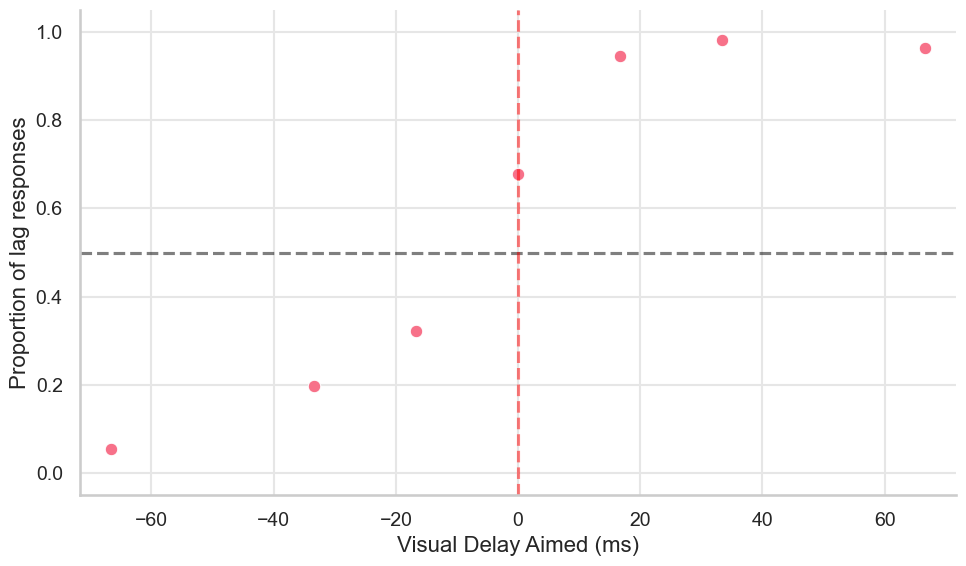

In [11]:
# Now plot only the mean responses for each visual delay aimed
# Group the data by visualDelayAimed and calculate the mean of responses
grouped_data = df.groupby('visualDelayAimed_ms').mean().reset_index()
grouped_data

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visualDelayAimed_ms', y='responses', data=grouped_data)
plt.axhline(y=0.5, color='k', linestyle='--',alpha=0.5)
plt.axvline(x=0, color='r', linestyle='--',alpha=0.5)

plt.xlabel('Visual Delay Aimed (ms)')
plt.ylabel('Proportion of lag responses')
plt.ylim(-0.05, 1.05)  # Extend the y-axis limit slightly beyond 0 and 1plt.title('Mean lag responses over visual delay')
plt.xlim(grouped_data['visualDelayAimed_ms'].min() - 5, grouped_data['visualDelayAimed_ms'].max() + 5)  # Extend the x-axis limit slightly beyond min and max values
plt.show()



(-105.0, 105.0)

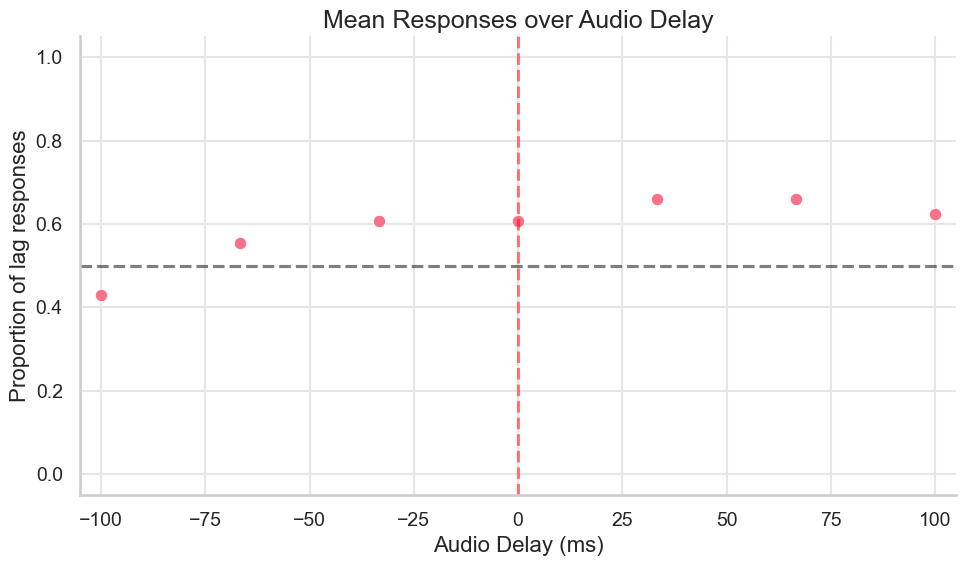

In [12]:
# Now plot the mean responses for only audio delay aimed
# Group the data by audioDelayAimed and calculate the mean of responses
grouped_data = df.groupby('audioDelayAimed_ms').mean().reset_index()
grouped_data
 
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='audioDelayAimed_ms', y='responses', data=grouped_data)
# plot a line on 0.5 to show the threshold
plt.axhline(y=0.5, color='k', linestyle='--',alpha=0.5)
plt.axvline(x=0, color='r', linestyle='--',alpha=0.5)

plt.xlabel('Audio Delay (ms)')
plt.ylabel('Responses')
plt.title('Mean Responses over Audio Delay')
plt.ylabel('Proportion of lag responses')
plt.ylim(-0.05, 1.05)  # Extend the y-axis limit slightly beyond 0 and 1plt.title('Mean lag responses over visual delay')
plt.xlim(grouped_data['audioDelayAimed_ms'].min() - 5, grouped_data['audioDelayAimed_ms'].max() + 5)  # Extend the x-axis limit slightly beyond min and max values
